## Package Dependencies

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, validation_curve, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import StandardScaler   
from sklearn.utils.validation import column_or_1d


## Retrieve data from Dataset

In [185]:
data = pd.read_csv("./archive/heart.csv")

## Dataset statistics

Top rows of the dataset

In [186]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataset statistics summary

In [187]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Dataset shape

In [188]:
print(data.shape)

(303, 14)


Dataset types

In [189]:
print(data.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


Are there any null values?

In [190]:
any(data.isnull().sum())

False

Drop dataframe duplicates

In [191]:
data.drop_duplicates(keep='first', inplace=True)

Dataset shape after droping duplicated values:

In [192]:
print(data.shape)

(302, 14)


### Correlation Matrix

A correlation matrix is a very important table which displays the correlation coefficients between all different pair of variables in a dataset (input + output variables). 

<AxesSubplot:>

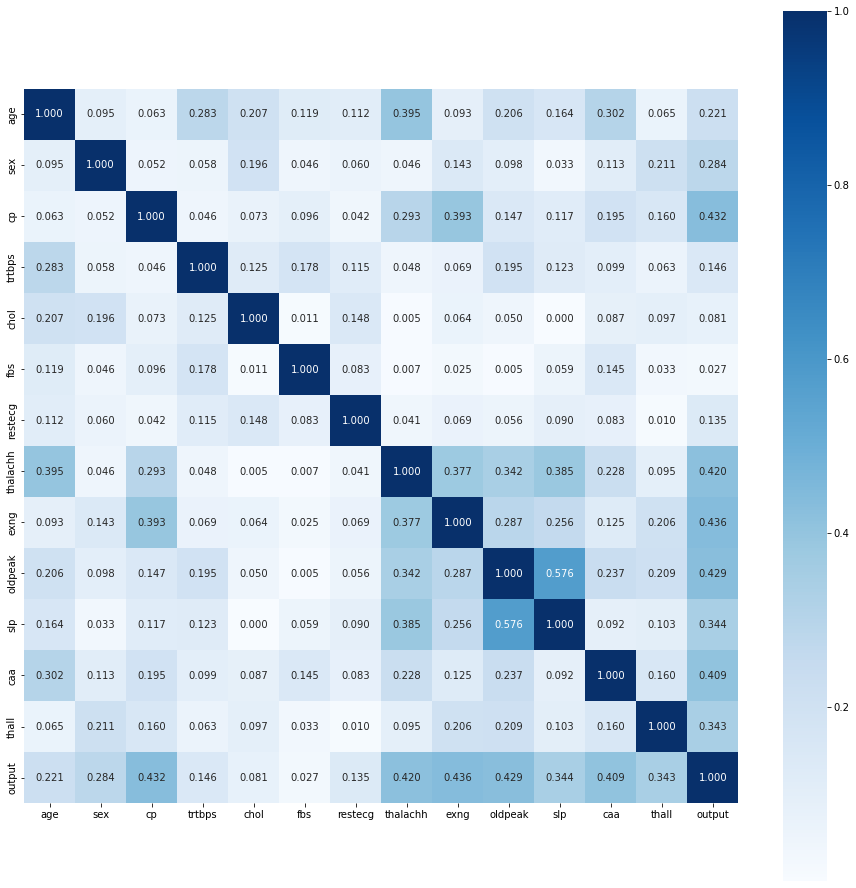

In [193]:
f, ax = plt.subplots(figsize=(16, 16))
correlation = data.corr()
sns.heatmap(abs(correlation), fmt='.3f', annot=True, cmap="Blues", square=True, ax=ax)

The correlation matrix promotes a fast way to identify patterns in the dataset. However, we want to see what input variables have the biggest correlation with the target variable (output). Thus, it's important to verify the *output* column to visualize what input variables have the most influence over the prediction of an heart attack in a person.

exng        0.435601
cp          0.432080
oldpeak     0.429146
thalachh    0.419955
caa         0.408992
slp         0.343940
thall       0.343101
sex         0.283609
age         0.221476
trtbps      0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: output, dtype: float64


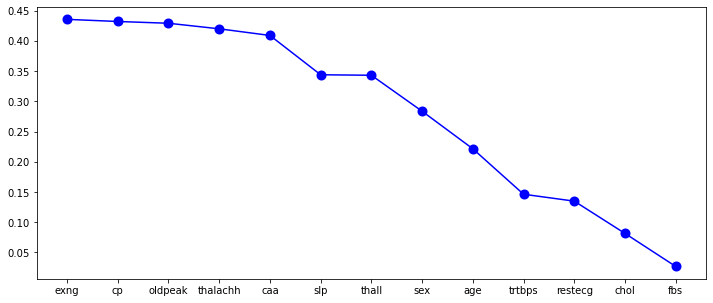

In [194]:
# Dataframe with the correlation between output and input variables and plot figure
output_correlation = abs(correlation["output"]).sort_values(ascending=False)[1:]
print(output_correlation)

plt.figure(figsize=(12,5))
plt.plot(output_correlation.index, output_correlation, color="blue")
plt.scatter(output_correlation.index, output_correlation, color="blue", lw=4)
plt.show()

Analyzing the printed data and the scatter graph, we can say that the most output correlated input variable is *exng* with 0.436757 and the least output correlated input variable is *fbs* with 0.028046.

No input variable is highly correlated with the target variable.

# Analysis

## Uni-variate analysis

### Output distribution

Text(0, 0.5, 'Count')

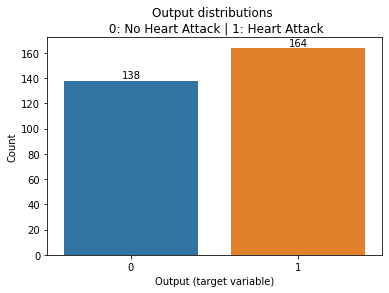

In [195]:
ax = sns.countplot(x='output', data=data)
ax.bar_label(ax.containers[0])
plt.title('Output distributions \n 0: No Heart Attack | 1: Heart Attack', fontsize=12)
plt.xlabel('Output (target variable)')
plt.ylabel('Count')

* ### Pair Plot

<Figure size 1440x1440 with 0 Axes>

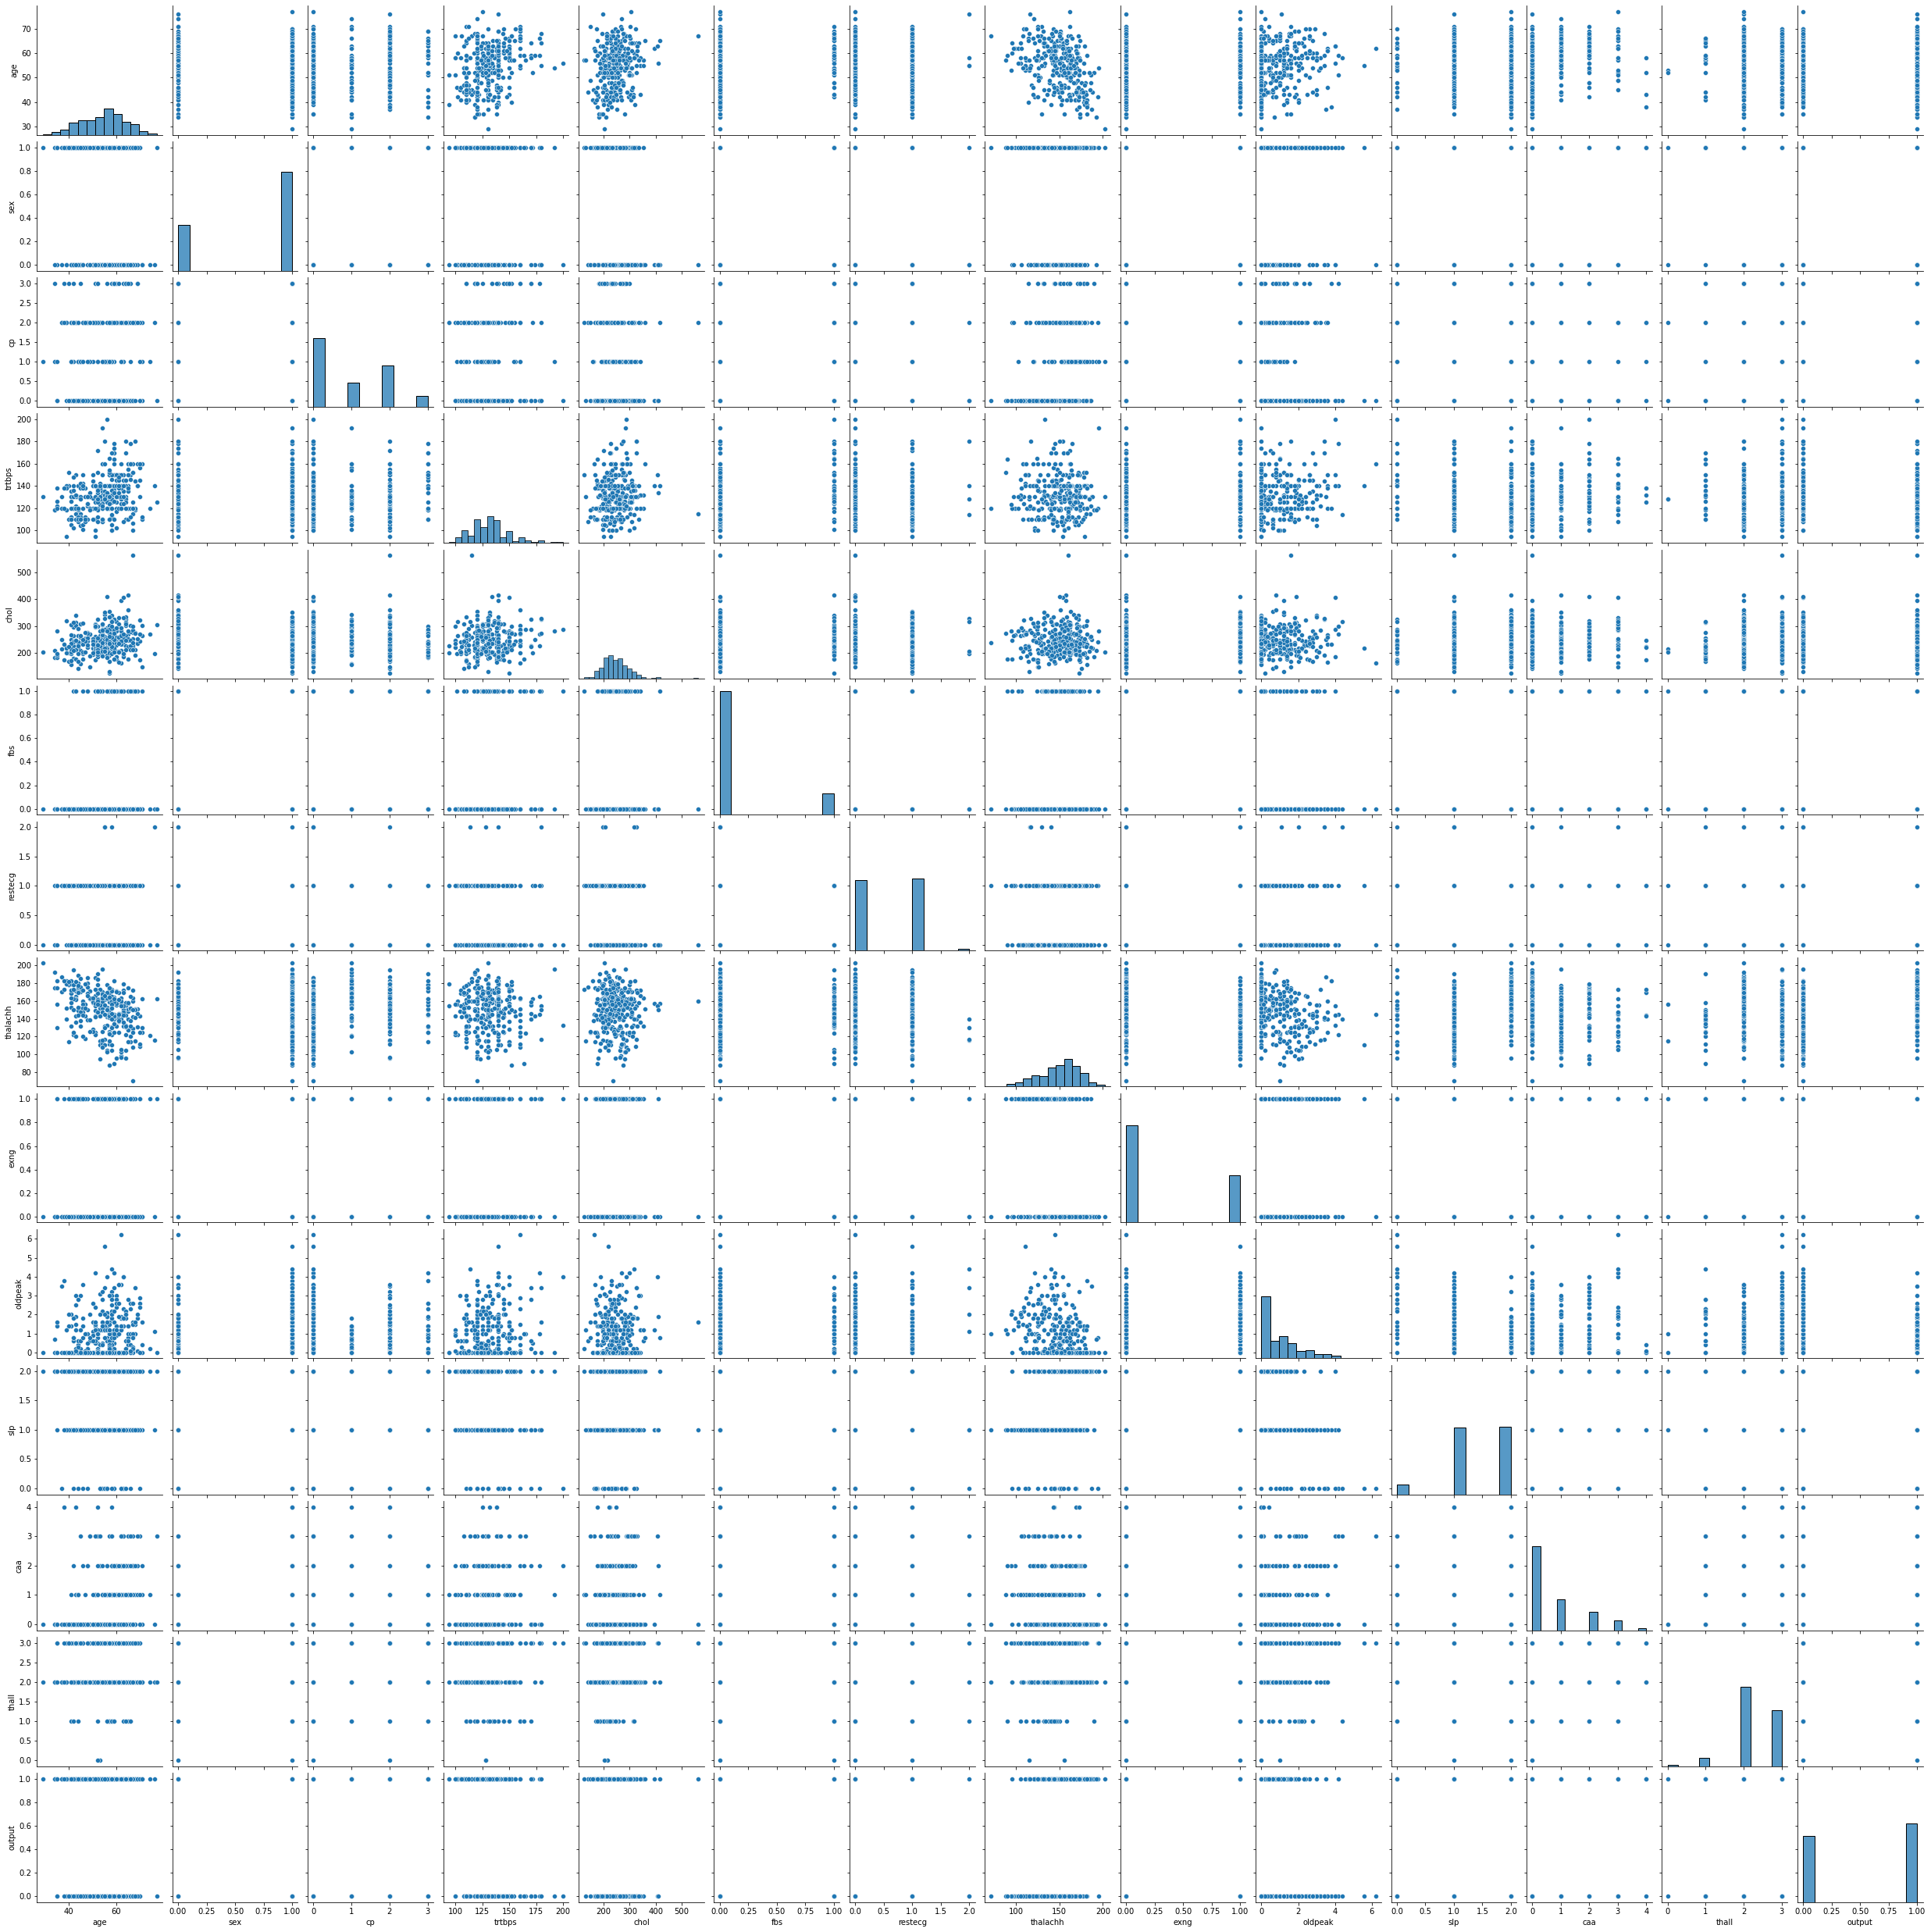

In [196]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

### Box Plot

#### For categorical variables:

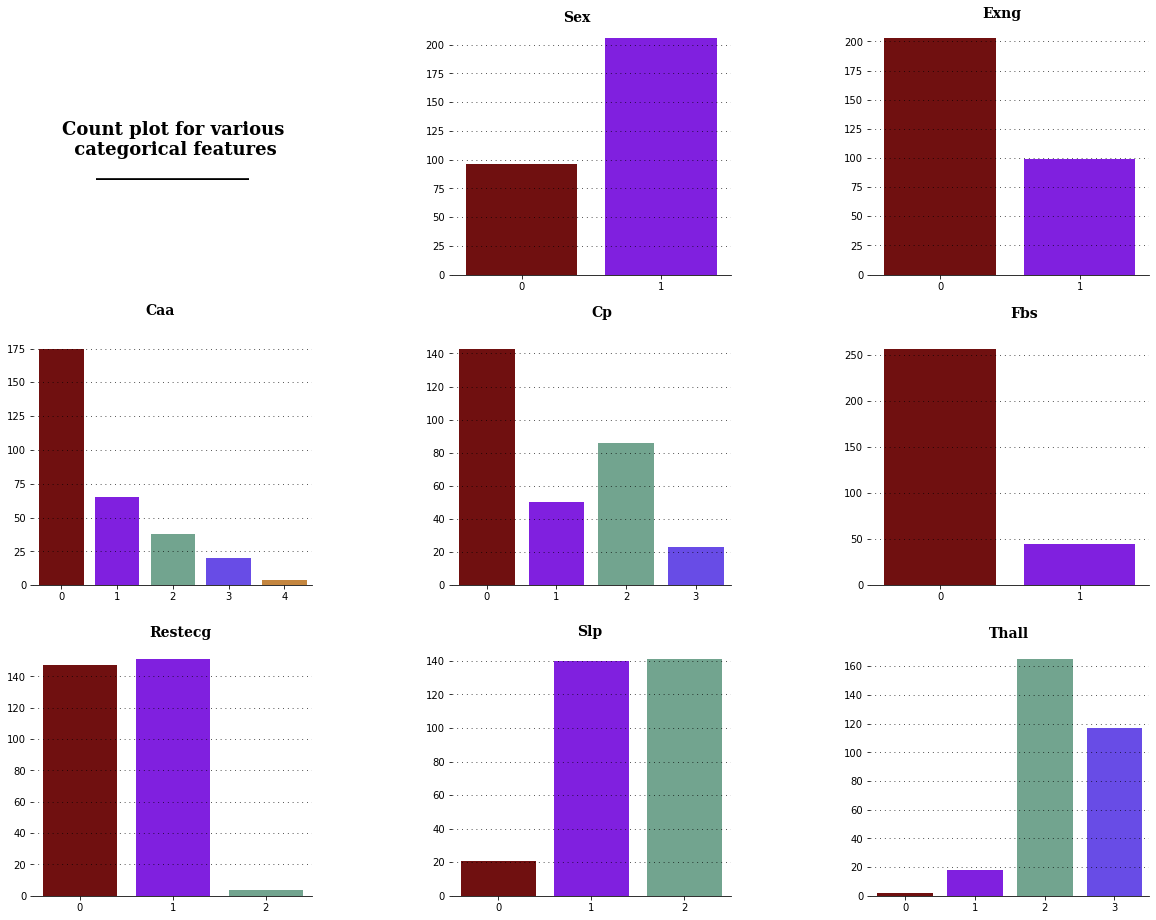

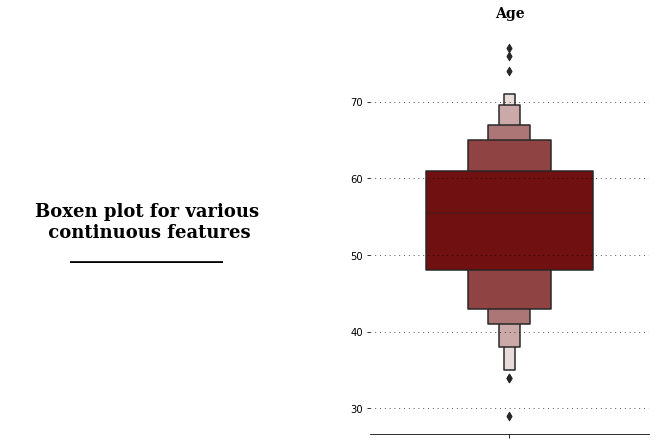

In [197]:
fig = plt.figure(figsize=(20,16))

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
grid = fig.add_gridspec(3,3)
grid.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(grid[0,0])
ax1 = fig.add_subplot(grid[0,1])
ax2 = fig.add_subplot(grid[0,2])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])
ax5 = fig.add_subplot(grid[1,2])
ax6 = fig.add_subplot(grid[2,0])
ax7 = fig.add_subplot(grid[2,1])
ax8 = fig.add_subplot(grid[2,2])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

background_color = "#fff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=data,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=data,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=data,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=data,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=data,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=data,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=data,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=data,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)




fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=data['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)



## Models

### Functions to train and analyse data

In [198]:
def train_and_analyze(model, X_train, y_train, X_test, y_test):

    # fitting the object
    model.fit(X_train, y_train)
    
    # finding the predicted valued
    y_pred = model.predict(X_test)

    # determine test accuracy
    test_data_accuracy = accuracy_score(y_pred, y_test)

    # F1_score = 2 * (P * R)/(P + R)
    #   P : Precision
    #   R : Recall of the model
    f1 = f1_score(y_test, y_pred)

    #   >> Accuracy vs F1-score
    # Accuracy is used when the True Positives and True negatives are more important 
    # while F1-score is used when the False Negatives and False Positives are crucial

    print()
    print("---- Model Analysis ----")
    print('Accuracy: ', test_data_accuracy * 100, "%")
    print('F1 Score: ', f1 * 100, "%")
    
    print()
    
    print("---- Confusion Matrix ----")
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print()
    print("---- Classification Report ----")
    print( classification_report(y_test, model.predict(X_test)) )
    


def hyperparameters(model, params, X, y):
    print(">> Find hyperparameters for a model")

    model = GridSearchCV(model, params, scoring="accuracy")
    model.fit(X, y)
    print(" Best Params: ")
    print(model.best_params_)
    
    return model.best_params_



def kfold(model, k, X_train, y_train, X_test, y_test):
    print(">> k-fold cross-validation")
    
    kf = KFold(n_splits=k, shuffle=True)
    scores = cross_validate(model, X_train, y_train, scoring="accuracy", cv=k, return_estimator=True)
    return scores["estimator"][np.argmax(scores["test_score"])]

### Data pre-processing

In [199]:
# [fonte]: https://www.javatpoint.com/logistic-regression-in-machine-learning

# creating a copy of data
data1 = data

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
data1 = pd.get_dummies(data1, columns = cat_cols, drop_first = True)

# defining the features and target
X = data1.drop(['output'],axis=1)
y = data1[['output']]
y = y.values.ravel()    # change the shape of y to (n_samples, )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling and normalization of data
st_x = StandardScaler()    
X_train = st_x.fit_transform(X_train)    
X_test = st_x.transform(X_test)  


* ### Logistic Regression

>> LOGISTIC REGRESSION

---- Model Analysis ----
Accuracy:  88.52459016393442 %
F1 Score:  88.52459016393443 %

---- Confusion Matrix ----


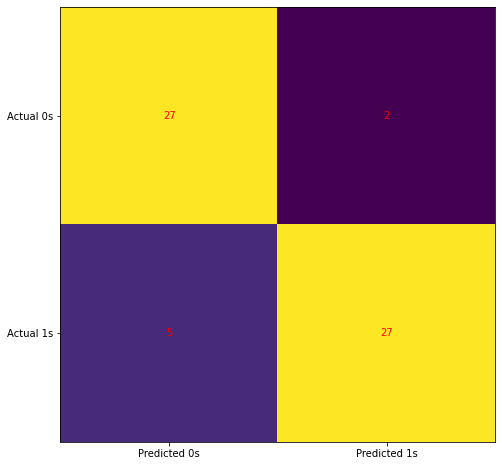


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

>> Find hyperparameters for a model
 Best Params: 
{'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

---- Model Analysis ----
Accuracy:  90.1639344262295 %
F1 Score:  89.99999999999999 %

---- Confusion Matrix ----


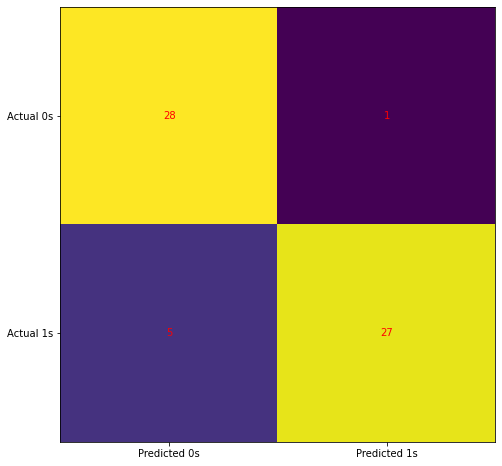


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61

>> k-fold cross-validation

---- Model Analysis ----
Accuracy:  90.1639344262295 %
F1 Score:  89.99999999999999 %

---- Confusion Matrix ----


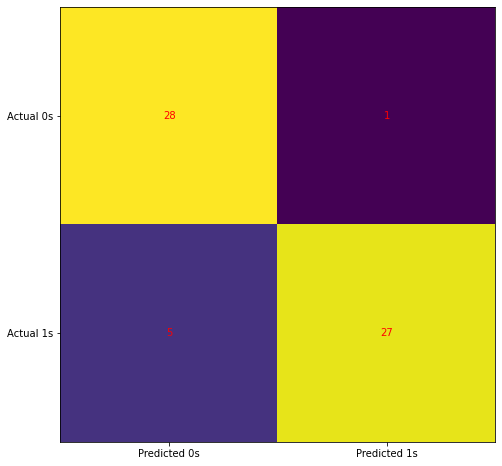


---- Classification Report ----
              precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.96      0.84      0.90        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [200]:
print(">> LOGISTIC REGRESSION")

# Base Model
logreg = LogisticRegression()
train_and_analyze(logreg, X_train, y_train, X_test, y_test)


# Hypertuned Params
logreg_params = [{'solver': ['liblinear'], 'max_iter': [100, 400, 800],
                  'C': [0.1, 1, 10, 100, 1000], 'class_weight': ['balanced'],
                  'penalty': ['l1', 'l2']}]
best_logreg_params = hyperparameters(logreg, logreg_params , X_train, y_train)

logreg.set_params(**best_logreg_params)
train_and_analyze(logreg, X_train, y_train, X_test, y_test)


# K-Fold Cross-Validation
kfmodel = kfold(logreg, 5, X_train, y_train, X_test, y_test)
train_and_analyze(kfmodel, X_train, y_train, X_test, y_test)